# Best performing model on natural scenes was 8 conv + 16 affine. Visualize it!

In [1]:
import numpy as np
from os.path import expanduser
import os
import json
import theano
import pyret.filtertools as ft
import pyret.visualizations as pyviz
import deepretina.visualizations as viz
from deepretina.preprocessing import datagen, loadexpt
from keras.models import model_from_json
import h5py
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline
#%matplotlib qt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

Using gpu device 0: GeForce GT 750M (CNMeM is disabled)


In [2]:
architecture_filename = 'architecture.json'
whitenoise_data_dir = expanduser('~/Dropbox/deep-retina/saved/lenna.salamander/2015-11-08 15.42.33 convnet/')
whitenoise_weight_filename = 'epoch018_iter01300_weights.h5' # .63 cc on held-out
naturalscenes_data_dir = expanduser('~/Dropbox/deep-retina/saved/lenna.salamander/2015-11-07 16.52.44 convnet/')
naturalscenes_weight_filename = 'epoch038_iter02700_weights.h5' # .53 cc on held-out

#### Load white noise model

In [3]:
whitenoise_architecture_data = open(whitenoise_data_dir + architecture_filename, 'r')
whitenoise_architecture_string = whitenoise_architecture_data.read()
whitenoise_model = model_from_json(whitenoise_architecture_string)
whitenoise_model.load_weights(whitenoise_data_dir + whitenoise_weight_filename)

In [6]:
whitenoise_weights = h5py.File(whitenoise_data_dir + whitenoise_weight_filename, 'r')
list(whitenoise_weights)

[u'layer_0', u'layer_1', u'layer_2', u'layer_3', u'layer_4']

#### Load natural scenes model

In [4]:
naturalscenes_architecture_data = open(naturalscenes_data_dir + architecture_filename, 'r')
naturalscenes_architecture_string = naturalscenes_architecture_data.read()
naturalscenes_model = model_from_json(naturalscenes_architecture_string)
naturalscenes_model.load_weights(naturalscenes_data_dir + naturalscenes_weight_filename)

In [7]:
naturalscenes_weights = h5py.File(naturalscenes_data_dir + naturalscenes_weight_filename, 'r')
list(naturalscenes_weights)

[u'layer_0', u'layer_1', u'layer_2', u'layer_3', u'layer_4']

# Cross-stimuli testing

In [8]:
naturalscenes_training = loadexpt(0, 'naturalscene', 'test', 40)
whitenoise_training = loadexpt(0, 'whitenoise', 'test', 40)

Loading testing data... Done.
Loading testing data... Done.


In [9]:
whitenoise_truth = []
naturalscenes_truth = []
whitenoise_on_whitenoise = []
whitenoise_on_naturalscenes = []
naturalscenes_on_whitenoise = []
naturalscenes_on_naturalscenes = []

### Test on white noise

In [10]:
for X, y in datagen(50, *whitenoise_training):
    whitenoise_truth.extend(y[)
    whitenoise_on_whitenoise.extend(whitenoise_model.predict(X))
    naturalscenes_on_whitenoise.extend(naturalscenes_model.predict(X))

#### Performance on white noise

Trained on white noise

In [22]:
whitewhite_performance = pearsonr(np.array(whitenoise_truth), np.array(whitenoise_on_whitenoise).squeeze())[0]
whitewhite_performance

0.62972344335667296

Trained on natural scenes

In [24]:
naturalwhite_performance = pearsonr(np.array(whitenoise_truth), np.array(naturalscenes_on_whitenoise).squeeze())[0]
naturalwhite_performance

0.36232118323330381

#### Test on natural scenes

In [19]:
for X, y in datagen(50, *naturalscenes_training):
    naturalscenes_truth.extend(y)
    whitenoise_on_naturalscenes.extend(whitenoise_model.predict(X))
    naturalscenes_on_naturalscenes.extend(naturalscenes_model.predict(X))

Trained on natural scenes

In [26]:
naturalnatural_performance = pearsonr(np.array(naturalscenes_truth), np.array(naturalscenes_on_naturalscenes).squeeze())[0]
naturalnatural_performance

0.52924176909365372

Trained on white noise

In [27]:
whitenatural_performance = pearsonr(np.array(naturalscenes_truth), np.array(whitenoise_on_naturalscenes).squeeze())[0]
whitenatural_performance

0.39040872985185721

So the model trained on white noise seems to generalize better than the model trained on natural scenes.

(0.3, 0.7)

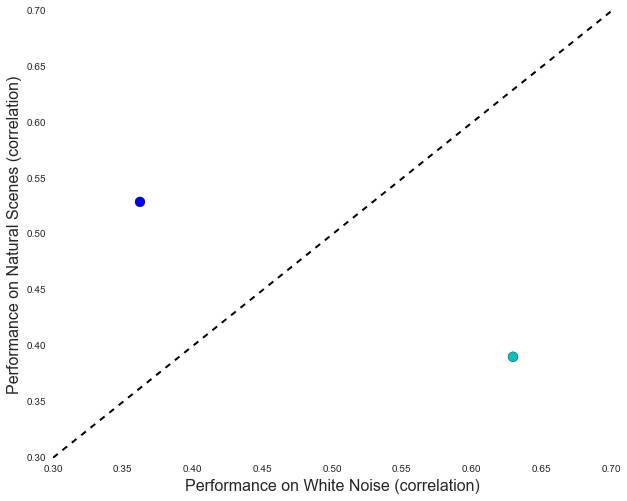

In [40]:
# plt natural scenes performance against white noise performance
plt.scatter([whitewhite_performance, naturalwhite_performance], 
            [whitenatural_performance, naturalnatural_performance], c=['c', 'b'], s=100)
plt.plot(np.linspace(0.3, 0.7, 4), np.linspace(0.3, 0.7, 4), 'k--', linewidth=2)
plt.xlabel('Performance on White Noise (correlation)', fontsize=16)
plt.ylabel('Performance on Natural Scenes (correlation)', fontsize=16)
plt.xlim([0.3, 0.7])
plt.ylim([0.3, 0.7])

# Filter differences between natural scenes and white noise models